<a href="https://colab.research.google.com/github/JamalMorales/Artificial-intelligence/blob/main/Assignments/AF5_FFNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 5.- Artificial Neural Network: feedforward.**

Name: Jamal Morales Sánchez ID: 2064497 Hour: N2-002

Name: Abigail Montserrat Nieto Solís ID: 2059067 Hour: N2-002

Name: Evelyn Rubí Martinez Ruíz ID: 2071292 Hour: N2-002

Name: Carlos Ernesto Martinez ID: 1975221 Hour: N2-002

Name: Gabriela Mariana Rangel Carrillo ID: 2006071 Hour: N2-002

# **1. Load libraries**
These tools will be used to build and evaluate the classification model.

In [113]:
# TensorFlow and tf.keras
import tensorflow as tf
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.19.0


# **2. Load data**

 Load the MNIST dataset using Keras.

In [116]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [117]:
class_names= ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

Explore the dataset.

In [118]:
print("Training set shape:", train_images.shape)
print("Number of training labels:", len(train_labels))
print("Unique labels:", np.unique(train_labels))

Training set shape: (60000, 28, 28)
Number of training labels: 60000
Unique labels: [0 1 2 3 4 5 6 7 8 9]


And finally we check the shape of test images.

In [119]:
print("Test images shape:", test_images.shape)

Test images shape: (10000, 28, 28)


# **3. Data preprocessing**

Data normalization

In [120]:
X_train = train_images.reshape(-1, 28*28) / 255.0
X_test  = test_images.reshape(-1, 28*28) / 255.0
y_train = train_labels
y_test  = test_labels

The first thing that we do before continue, it´s visualize the data with Matplot libraries, with a simple call.

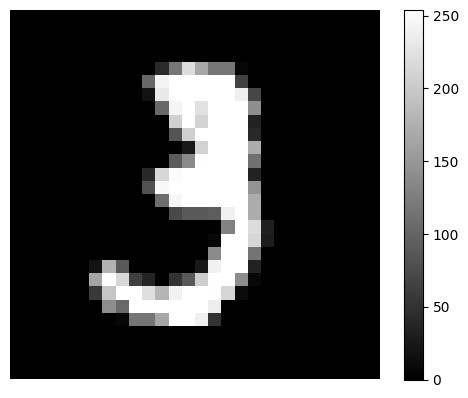

In [121]:
plt.figure()
plt.imshow(train_images[10], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.axis('off')
plt.show()

Quick visualization (first 25 training images).

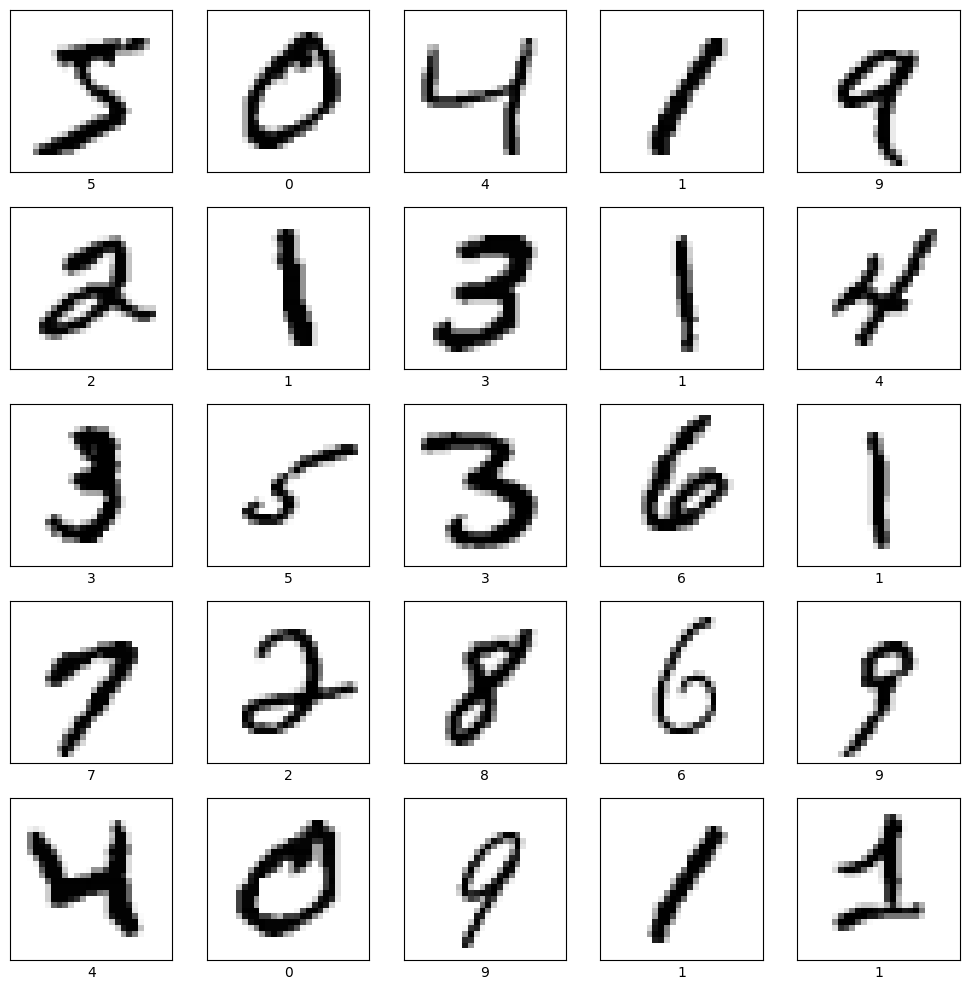

In [122]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([]); plt.yticks([]); plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.tight_layout(); plt.show()

# **4. Model selection and training**

Training model using FNN through scikit

In [123]:
clf = MLPClassifier(hidden_layer_sizes=(128,), max_iter=30, random_state=42)

Using scikit's "fit" function

In [124]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(128,), max_iter=30, random_state=42)

# **5. Model testing**

Getting predictions for the entire test set

In [125]:
y_pred = clf.predict(X_test)

Evaluating accuracy (using scikit)

In [126]:
test_acc = accuracy_score(y_test, y_pred)
print(f'\nTest accuracy (sklearn): {test_acc:.4f}')


Test accuracy (sklearn): 0.9770


Making 5 predictions and comparing results


--- 5 Example Predictions ---
Example 0: Prediction: 7 -> Real Value: 7


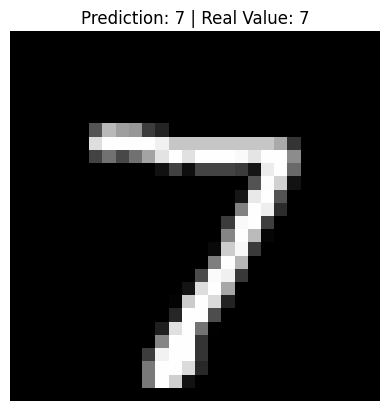

Example 1: Prediction: 2 -> Real Value: 2


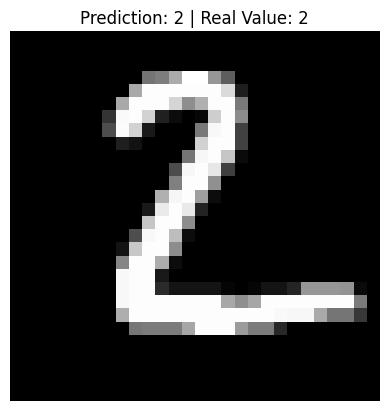

Example 2: Prediction: 1 -> Real Value: 1


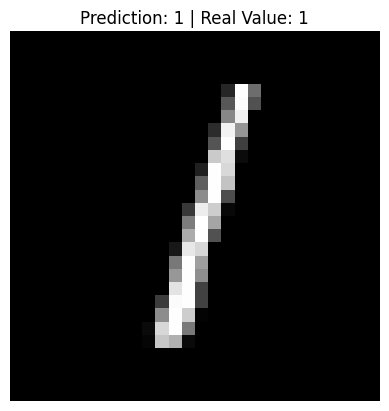

Example 3: Prediction: 0 -> Real Value: 0


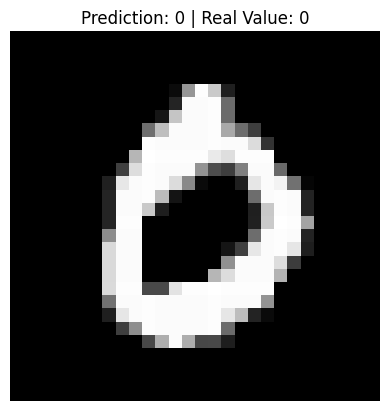

Example 4: Prediction: 4 -> Real Value: 4


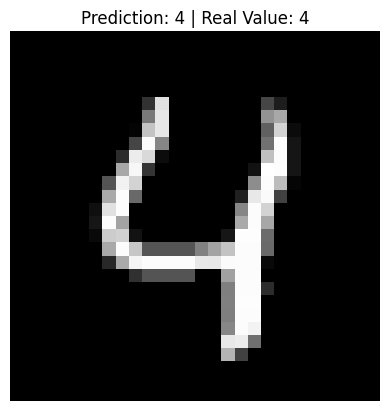

In [127]:
print("\n--- 5 Example Predictions ---")
for i in range(5):
    print(f"Example {i}: Prediction: {int(y_pred[i])} -> Real Value: {int(y_test[i])}")

    # Show the original image (from test_images, not the flattened X_test)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"Prediction: {int(y_pred[i])} | Real Value: {int(y_test[i])}")
    plt.axis('off')
    plt.show()

# Helper plotting functions

Display a single test image with a descriptive xlabel that shows the model’s predicted class name, the prediction confidence as a percentage, and the true class name. The xlabel is colored blue when the prediction is correct and red when it is incorrect.

In [128]:
def plot_image(i, predictions_array, true_labels, images):
    true_label = int(true_labels[i])
    img = images[i]
    prediction = predictions_array

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img if img.ndim == 2 else img.reshape(28, 28), cmap=plt.cm.binary)

    predicted_label = np.argmax(prediction)
    confidence = 100 * np.max(prediction)
    color = 'blue' if predicted_label == true_label else 'red'

    label_text = f"{class_names[predicted_label]} {confidence:.0f}% ({class_names[true_label]})"
    plt.xlabel(label_text, color=color)

Draw a bar chart of the 10 class probabilities for a single test sample, highlighting the predicted class in red and the true class in blue.

In [129]:
def plot_value_array(i, predictions_array, true_labels):
    true_label = int(true_labels[i])
    prediction = predictions_array

    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    bars = plt.bar(range(10), prediction, color="#777777")
    plt.ylim([0, 1])

    predicted_label = np.argmax(prediction)
    bars[predicted_label].set_color('red')
    bars[true_label].set_color('blue')

We evaluate the model, call model.predict(test_images) to get per-sample probability vectors, convert each vector to a predicted class with np.argmax, then display a few examples side-by-side: the image with predicted label and confidence and a bar chart of the 10 class probabilities (predicted bar red, true bar blue).

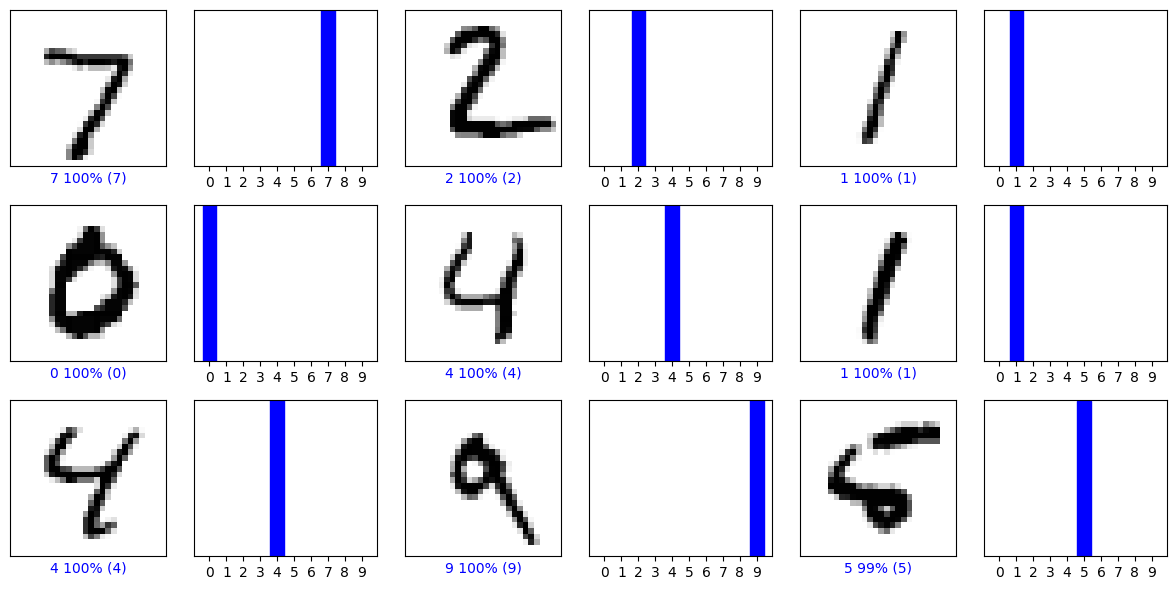

In [130]:
# Get probability predictions
y_pred_proba = clf.predict_proba(X_test)

num_rows = 3
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
  plot_image(i, y_pred_proba[i], test_labels, test_images)
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
  plot_value_array(i, y_pred_proba[i], test_labels)
plt.tight_layout()
plt.show()

In [131]:
y_pred = clf.predict(X_test)
print("Test accuracy (sklearn):", f"{accuracy_score(y_test, y_pred):.4f}")
print("Five examples (predicted -> actual):")
for i in range(5):
    print(f"{i}: {int(y_pred[i])} -> {int(y_test[i])}")

Test accuracy (sklearn): 0.9770
Five examples (predicted -> actual):
0: 7 -> 7
1: 2 -> 2
2: 1 -> 1
3: 0 -> 0
4: 4 -> 4
